<h1 style="font-size:3rem;color:#A3623B;">Lab 2</h1>

## Security and Ethical aspects of data
### Amaya Nogales Gómez

## 2.1 Support Vector Machines


In [119]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [120]:
#We load the real dataset from Lab 1: iris
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes
#print(iris)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [121]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
#print(X)

y = iris["target"]


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)
print(X.size)

100
200


In [122]:
#Now we normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [123]:
from sklearn.svm import SVC

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

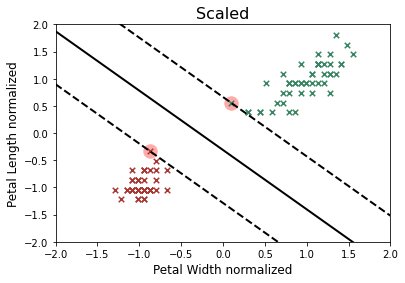

Accuracy: 1.0


In [124]:
# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_scaled, y)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

##########################################################
######### Below part is for QUESTION-5 #############
##########################################################

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=109)
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Questions:

1-Obtain and plot the SVM classifier for the dataset from Lab 1, Part 1.1. (X_syn, y_syn).

2-Which differences do you observe from the SVM classifier for the iris dataset?

3-How can you make it more "similar" to the iris classifier? Plot different SVM classifiers.

4-Load another real dataset from sklearn library, obtain the SVM classifier and plot both. Note: select only 2 features to be in dimension 2 as we did with the iris dataset.

5-Provide a table with accuracy results for all the classifiers above.


(100, 2)
(100,)


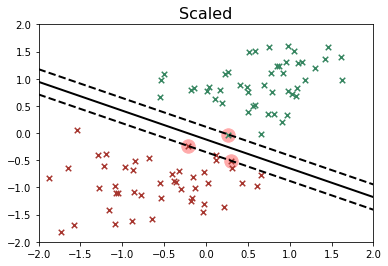

Accuracy: 1.0


In [125]:
# QUESTION.1
#
#
#Obtain and plot the SVM classifier for the dataset from Lab 1, Part 1.1. (X_syn, y_syn).
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


def generate_synthetic_data():
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y
    """ Generate the features randomly """

    #a)n=100, 50% of objects in Class -1, 50% in Class +1, linearly separable.
    '''
    n_samples1 = 50 
    n_samples2 = 50
    mu1, sigma1 = [12, 12], [[5, 1], [1, 5]]
    mu2, sigma2 = [-1,-1], [[10, 1], [1, 3]]
    '''
    
    #b)n=100, 50% of objects in Class -1, 50% in Class +1, non-linearly separable.
    n_samples1 = 50
    n_samples2 = 50
    mu1, sigma1 = [5, 5], [[5, 1], [1, 3]]
    mu2, sigma2 = [-1,-1], [[10, 1], [1, 3]]

    nv1, X1, y1= gen_gaussian(int(n_samples1), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples2), mu2, sigma2, 0) # negative class
   
    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    # shuffle the data
    perm = list(range(0,100))
    shuffle(perm)    
    X = X[perm]
    y = y[perm]
    return X,y

X_syn, y_syn = generate_synthetic_data() 
print(X_syn.shape)
print(y_syn.shape)
############################################################################
############# The above part was from Lab.1 ###########################
############################################################################

#Let's normalize the synthetic data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_syn = scaler.fit_transform(X_syn)


svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_syn, y_syn)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()


##########################################################
######### Below part is for QUESTION-5 #############
##########################################################

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.3,random_state=109)
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [126]:
#QUESTION.2
#
#Which differences do you observe from the SVM classifier for the iris dataset?
#
# 1. For the NON-linearly separable synthetic data: 
#We can generate non-linearly seperable data with the previous code. SVM may not classify the data points if 
# the "kernel" parameter in SVM is "linear". We need to change the "kernel" parameter to "Polynomial", "RBF", or "Sigmoid" to 
#correctly classify the data points.
#
# 2. For the linearly separable synthetic data: In the iris dataset, there are two data points that are on the support-vectors. 
#In the synthetic data, it can be 2 or more data points that can be on the support-vectors depending on the creation of the dataset. 
#Since the data points are randomly generated, the margin violations or the number of points on the support-vectors changes everytime. 
#Linearly separable synthetic data is actually not very different from the iris dataset. 

In [127]:
#QUESTION.3
#
#How can you make it more "similar" to the iris classifier? Plot different SVM classifiers?
# ANSWER:
# 1. We need to find a fix synthehtic dataset i.e we shouldn't produce data points over and over again because data points are randomly generated.
# In every iteration of producing data points results in a different dataset. So fix the synthetic dataset.
#
# 2. We need to generate data points that are linearly separable. If the data points are NOT linearly separable then,
# SVM classifier with parameter "kernel=linear" will not classify data points. (In this case we need to change the "kernel" parameter
# but the dataset will be more different from the iris dataset)
#
# 3. We can change the "C" parameter in the SVM. The hyperparameter C controls the margin violations. And smaller C leads 
# to more margin violations but wider margin. So, we can play with the C parameter to make it similar to iris classifier. For example, if there are so many
# margin violation comparing to iris, then we will increase the C.
#
# Different plottins are below:

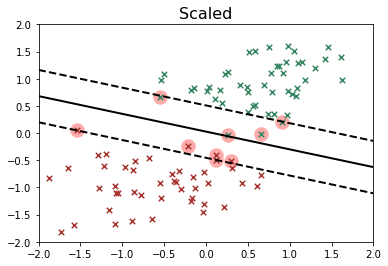

Accuracy: 1.0


In [128]:
#The FIRST plotting of svm classifier with synthetic data for QUESTION-3
# The number of misclassified data points = 9
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_syn, y_syn)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()



##########################################################
######### Below part is for QUESTION-5 #############
##########################################################

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.3,random_state=109)
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

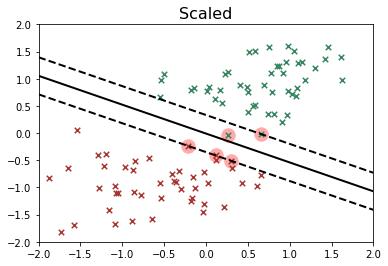

Accuracy: 1.0


In [129]:
#The SECOND plotting of svm classifier with synthetic data for QUESTION-3
#To make it more similar to iris classifier, I will increase the C parameter
#
# The number of misclassified data points = 5
svm_clf = SVC(kernel="linear", C=5)
svm_clf.fit(X_syn, y_syn)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()


##########################################################
######### Below part is for QUESTION-5 #############
##########################################################

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.3,random_state=109)
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

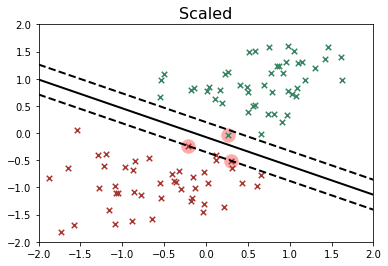

Accuracy: 1.0


In [130]:
#The THIRD plotting of svm classifier with synthetic data for QUESTION-3
#Increase C more
#
## The number of misclassified data points = 3 (More similar to iris classifier)
svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X_syn, y_syn)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()



##########################################################
######### Below part is for QUESTION-5 #############
##########################################################

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.3,random_state=109)
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

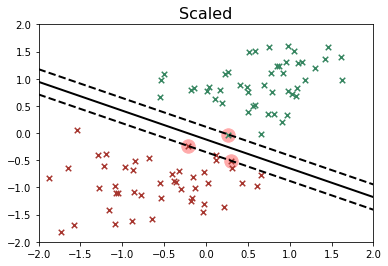

Accuracy: 1.0


In [131]:
#The FOURTH plotting of svm classifier with synthetic data for QUESTION-3
#Increase C more and more
svm_clf = SVC(kernel="linear", C=50)
svm_clf.fit(X_syn, y_syn)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()


##########################################################
######### Below part is for QUESTION-5 #############
##########################################################

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.3,random_state=109)
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
569
1138


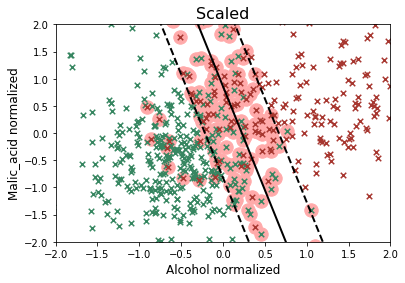

Accuracy: 0.9122807017543859


In [132]:
#QUESTION-4
#
#4-Load another real dataset from sklearn library, obtain the SVM classifier and plot both. 
#Note: select only 2 features to be in dimension 2 as we did with the iris dataset.

import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

#Let's load the breast cancer dataset
from sklearn import datasets
cancer = datasets.load_breast_cancer()

print(cancer.data.shape)
print(cancer.feature_names) #variables, features
print(cancer.target_names) #classes

#Let's choose the first two columns
X = cancer["data"][:, (0, 1)]  # 'mean radius' 'mean texture'
y = cancer["target"]
#Let's choose 'malignant' and 'benign'. This is not needed because there are 2 classes for cancer, but let's do it.
malignant_and_benign = (y == 0) | (y == 1)
X = X[malignant_and_benign]
y = y[malignant_and_benign]
print(y.size)
print(X.size)

#####################################
#Now we normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_scaled, y)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.xlabel("Alcohol normalized", fontsize=12)
plt.ylabel("Malic_acid normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()
#
#
#
# I just selected the 2 features of the breast cancer dataset. Because of this, the data point are not linearly separable.
# I tried the other features of the dataset but it is impossible to linearly separate the data points. 
# Changing the C parameter also doesn't work. But its ok, let me leave it like this.
#
#


##########################################################
######### Below part is for QUESTION-5 #############
##########################################################

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=109)
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [133]:
#QUESTION-5
#
#5-Provide a table with accuracy results for all the classifiers above.

#The accuracy calculations are above. They place in the corresponding questions/cells.

#If "tabulate" module is not installed:
#!pip install tabulate
from tabulate import tabulate

table = [['Experiment name', 'Accuracy (over 1)'], ['iris', 1.0], ["Q1",1.0], ["Q3.1",1.0],["Q3.2",1.0],["Q3.3",1.0],["Q3.4",1.0],["Q4",0.912]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═══════════════════╤═════════════════════╕
│ Experiment name   │   Accuracy (over 1) │
╞═══════════════════╪═════════════════════╡
│ iris              │               1     │
├───────────────────┼─────────────────────┤
│ Q1                │               1     │
├───────────────────┼─────────────────────┤
│ Q3.1              │               1     │
├───────────────────┼─────────────────────┤
│ Q3.2              │               1     │
├───────────────────┼─────────────────────┤
│ Q3.3              │               1     │
├───────────────────┼─────────────────────┤
│ Q3.4              │               1     │
├───────────────────┼─────────────────────┤
│ Q4                │               0.912 │
╘═══════════════════╧═════════════════════╛


## 2.2 Generating Biased data

Now you are going to generate a toy example of synthetic biased data. You will reproduce the Representation bias and Aggregation bias defined in Lecture 2.

As a reminder:

Representation bias occurs when certain parts of the input space are underrepresented.

Aggregation bias arises when a one-size-fit-all model is used for groups with different conditional distributions.

In order to create these two type of bias, we can "play" with the probability of an object $i$ of being protected, and the parameters of the distribution (Gaussian in our example) these protected objects follow.

In the following, you will obtain a dataset with aggregation bias.

100
100
100


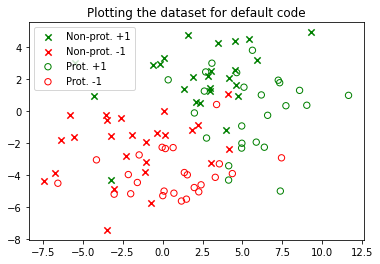

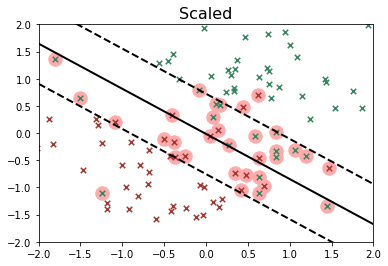

Accuracy: 0.8


In [134]:
#
#
#This is the provided/default code i.e. the teacher gave this code. 
#I only added a SVM classier at the end to answer QUESTION-4 and QUESTION-6.
#
#
def generate_synthetic_data_bias():

    
    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.5 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[3,-2] # This is the increment of the mean for the positive class
    delta2=[3,-2] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    #For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1,delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    

    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias()

print(len(X_syn))
print(len(y_syn))
print(len(x_bias))

X_s_0 = X_syn[x_bias == 0.0]
X_s_1 = X_syn[x_bias == 1.0]
y_s_0 = y_syn[x_bias == 0.0]
y_s_1 = y_syn[x_bias == 1.0]

plt.scatter(X_s_0[y_s_0==1][:, 0], X_s_0[y_s_0==1][:, 1], color='green', marker='x', s=40, linewidth=1.5, label= "Non-prot. +1")
plt.scatter(X_s_0[y_s_0==0][:, 0], X_s_0[y_s_0==0][:, 1], color='red', marker='x', s=40, linewidth=1.5, label = "Non-prot. -1")
plt.scatter(X_s_1[y_s_1==1][:, 0], X_s_1[y_s_1==1][:, 1], color='green', marker='o', facecolors='none', s=40, label = "Prot. +1")
plt.scatter(X_s_1[y_s_1==0][:, 0], X_s_1[y_s_1==0][:, 1], color='red', marker='o', facecolors='none', s=40, label = "Prot. -1")


plt.title("Plotting the dataset for default code")
plt.legend(loc=2, fontsize=10)

plt.show()


##########################################################
# Below part is for QUESTION-4 and QUESTION-6 
##########################################################

#Now we normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_syn)
y=y_syn

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_scaled, y)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=109)
y_pred = svm_clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Questions:

1-Create and plot a dataset with an aggregation bias (much) stronger than in the previous dataset.

2-Do you think the SVM classifier will perform with the same accuracy for the protected and non-protected groups? Why?

3-Create a dataset with representation bias (hint: you can only change p_sen and/or delta1 and/or delta2).

4-Find the SVM classifier for the 3 datasets: the one provided, the one from question 1 and the other one from question 3. (Answer: the coefficients (w,b) defining the classifier for each case).

5*-Provide a table reporting accuracy for the 3 cases from question 3.

6*-Plot the datasets and classifiers from question 3.



100
100
100


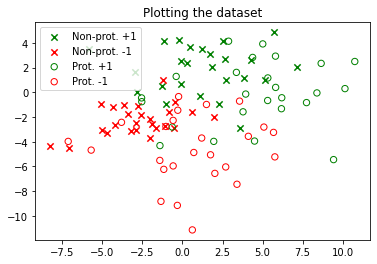

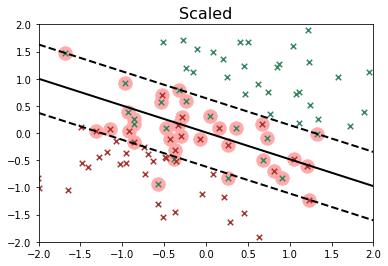

Accuracy: 0.8666666666666667


In [135]:
#QUESTION-1
#
#For the creation of aggregation bias in the dataset, the number of data points for protected and non-protected groups are equal because they
# should be represented equally in the trainnig dataset.

#Aggregation bias can lead to a model that is not optimal for any group, or a model that is fit to the dominant population. In my case there is no
#dominant group because their sizes are equal. 

#To make aggregation bias, my method is to make closer to the data points in each class. With this, SVM will suffer from classifying data points 
#in each group for protected and non-protected data points.

def generate_synthetic_data_bias_Q1():   
    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.5 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[3,-2] # This is the increment of the mean for the positive class
    delta2=[3,-2] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    
    #For the NON-protected group (sensitive feature=0, for ex. men)
    mu1, sigma1 = [2, 2], [[7, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[8, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    mu3, sigma3 = np.add(mu1,delta1), [[10, 1], [1, 6]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 6]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    
    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias_Q1()
print(len(X_syn))
print(len(y_syn))
print(len(x_bias))

X_s_0 = X_syn[x_bias == 0.0]
X_s_1 = X_syn[x_bias == 1.0]
y_s_0 = y_syn[x_bias == 0.0]
y_s_1 = y_syn[x_bias == 1.0]

plt.scatter(X_s_0[y_s_0==1][:, 0], X_s_0[y_s_0==1][:, 1], color='green', marker='x', s=40, linewidth=1.5, label= "Non-prot. +1")
plt.scatter(X_s_0[y_s_0==0][:, 0], X_s_0[y_s_0==0][:, 1], color='red', marker='x', s=40, linewidth=1.5, label = "Non-prot. -1")
plt.scatter(X_s_1[y_s_1==1][:, 0], X_s_1[y_s_1==1][:, 1], color='green', marker='o', facecolors='none', s=40, label = "Prot. +1")
plt.scatter(X_s_1[y_s_1==0][:, 0], X_s_1[y_s_1==0][:, 1], color='red', marker='o', facecolors='none', s=40, label = "Prot. -1")


plt.title("Plotting the dataset")
plt.legend(loc=2, fontsize=10)

plt.show()

##########################################################
# Below part is for QUESTION-4 and QUESTION-6 
##########################################################

#Now we normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_syn)
y=y_syn

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_scaled, y)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=109)
y_pred = svm_clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [136]:
#QUESTION-2
#
#Do you think the SVM classifier will perform with the same accuracy for the protected and non-protected groups? Why?
#
#Answer:
#Aggregation bias arises when a one-size-fit-all model is used for groups with different conditional distributions.
#Aggregation bias can lead to a model that is not optimal for any group, or a model that is fit to the dominant population.
# I think, the SVM will perform similar accuracies in the classification of protected and non-protected data points in the dataset if 
#there is aggregation bias. Because they are represented equally in the trainig data. So, the probşem with aggregaiton bais is that 
# we are using only one classifier for the classification task and it is not enough to do well. We are trying to fit the dataset in only one model.
#The data points are not proper for one classifier.

100
100
100


/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


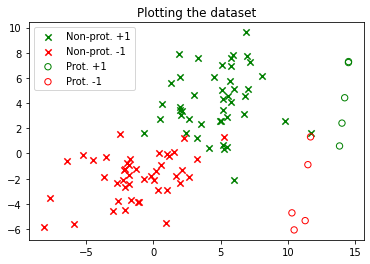

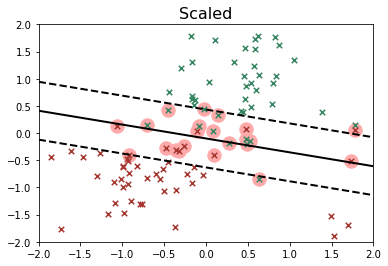

Accuracy: 0.9666666666666667


In [137]:
#QUESTION-3
#
#For the creation of representation bias in the dataset, I reduce the number of data points for the protected group.
#In representation bias, The sampling methods only reach a portion of the population and the population of interest has changed or is distinct 
#from the population used during model training. 
#To make representation bias, I reduce the number of data points in protected data(women) to make a subgroup. 
#The number of points become 10 (5 in each class).
#The non-protected groups have 90 points(45 in each class).
#Then, I collected the non-protected data points together i.e. make them close to each other.  Then, I tried to spread the protected
#data points away from the non-protected group to give them more different faetures than the non-protected group. I did by changing the delta parameters
#So protected groups are  underrepresented. If we use these protected groups in testing set, then the accuracy would be really bad

def generate_synthetic_data_bias_Q1():   
    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.5 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[10,-2] # This is the increment of the mean for the positive class
    delta2=[13,-2] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    
    #For the NON-protected group (sensitive feature=0, for ex. men)
    mu1, sigma1 = [4, 4], [[7, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[8, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*90), mu1, sigma1, 1,0) # positive class
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*90),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    mu3, sigma3 = np.add(mu1,delta1), [[1, 10], [1, 10]]
    mu4, sigma4 = np.add(mu2,delta2), [[1, 10], [1, 6]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*10), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*10),mu4, sigma4, 0,1.) # negative class

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    
    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias_Q1()
print(len(X_syn))
print(len(y_syn))
print(len(x_bias))


X_s_0 = X_syn[x_bias == 0.0]
X_s_1 = X_syn[x_bias == 1.0]
y_s_0 = y_syn[x_bias == 0.0]
y_s_1 = y_syn[x_bias == 1.0]

plt.scatter(X_s_0[y_s_0==1][:, 0], X_s_0[y_s_0==1][:, 1], color='green', marker='x', s=40, linewidth=1.5, label= "Non-prot. +1")
plt.scatter(X_s_0[y_s_0==0][:, 0], X_s_0[y_s_0==0][:, 1], color='red', marker='x', s=40, linewidth=1.5, label = "Non-prot. -1")
plt.scatter(X_s_1[y_s_1==1][:, 0], X_s_1[y_s_1==1][:, 1], color='green', marker='o', facecolors='none', s=40, label = "Prot. +1")
plt.scatter(X_s_1[y_s_1==0][:, 0], X_s_1[y_s_1==0][:, 1], color='red', marker='o', facecolors='none', s=40, label = "Prot. -1")


plt.title("Plotting the dataset")

plt.legend(loc=2, fontsize=10)

plt.show()

##########################################################
# Below part is for QUESTION-4 and QUESTION-6 
##########################################################

#Now we normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_syn)
y=y_syn

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_scaled, y)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=109)
y_pred = svm_clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [138]:
#
#QUESTION-4
#
#The SVM classifiers are located in each cell of other questions, at hte bottom part.
#

In [139]:
#QUESTION-5
#
#Provide a table with accuracy results 
#These result sligthly change in each experiment because the data points are generated randomly.
#

#If "tabulate" module is not installed:
#!pip install tabulate
from tabulate import tabulate

table = [['Experiment name', 'Accuracy (over 1)'], ['default', 0.933], ["Q1",0.966], ["Q3",0.966]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════════════════╕
│ Experiment name   │   Accuracy (over 1) │
╞═══════════════════╪═════════════════════╡
│ default           │               0.933 │
├───────────────────┼─────────────────────┤
│ Q1                │               0.966 │
├───────────────────┼─────────────────────┤
│ Q3                │               0.966 │
╘═══════════════════╧═════════════════════╛


In [140]:
#QUESTION-6
#
#The datasets and classifiers are plotted in each cell, at the bottom of the cell.
#
